Visualise and download Sentinel products using geojson

In [1]:
import geopandas as gpd
import folium
import os
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt
import numpy as np
import os
#from geojson import Point
from geojson import Polygon
import geojson
import tempfile
import datetime as dt


Show geojson boundary on folium map


In [2]:
m = folium.Map(location=[35.9452,14.3797], zoom_start=10)
boundsdata = r'./data/Zabbar.geojson'
folium.GeoJson(boundsdata).add_to(m)
m


Connect to Sentinelsat API

In [3]:
user = 'tertiadecima' ## change this!
password = 'contr0LPane!' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

#convert geojson to well-known-text
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)


MULTIPOLYGON(((14.5273 35.8809,14.5366 35.8887,14.5549 35.8796,14.5545 35.8619,14.5432 35.8561,14.5240 35.8685,14.5273 35.8809)))


Search for Sentinel Products

In [4]:
#search sentinel product
products = api.query(footprint,
                     #YmD
                     date = ('20190305', '20190310'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1C',
                     cloudcoverpercentage = (0, 5))

Print table with Sentinel products found

In [5]:
api.to_geodataframe(products)


C:\Users\MCAST\anaconda3\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
4cb57cdd-1362-4580-8af4-23b3d136938d,S2B_MSIL2A_20200305T094029_N0214_R036_T33SVV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-03-05T09:40:29.024Z, Instrument: MS...",false,2020-03-05 09:40:29.024,2020-03-05 09:40:29.024,2020-03-05 18:24:50.163,15649,...,02.14,Level-2A,S2MSI2A,Sentinel-2,511.98 MB,S2B_MSIL2A_20200305T094029_N0214_R036_T33SVV_2...,S2B_OPER_MSI_L1C_TL_MPS__20200305T114530_A0156...,S2B_MSIL2A_20200305T094029_N0214_R036_T33SVV_2...,4cb57cdd-1362-4580-8af4-23b3d136938d,"MULTIPOLYGON (((14.19236 35.15110, 15.10716 35..."


Visualise product footprints

C:\Users\MCAST\anaconda3\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\MCAST\anaconda3\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


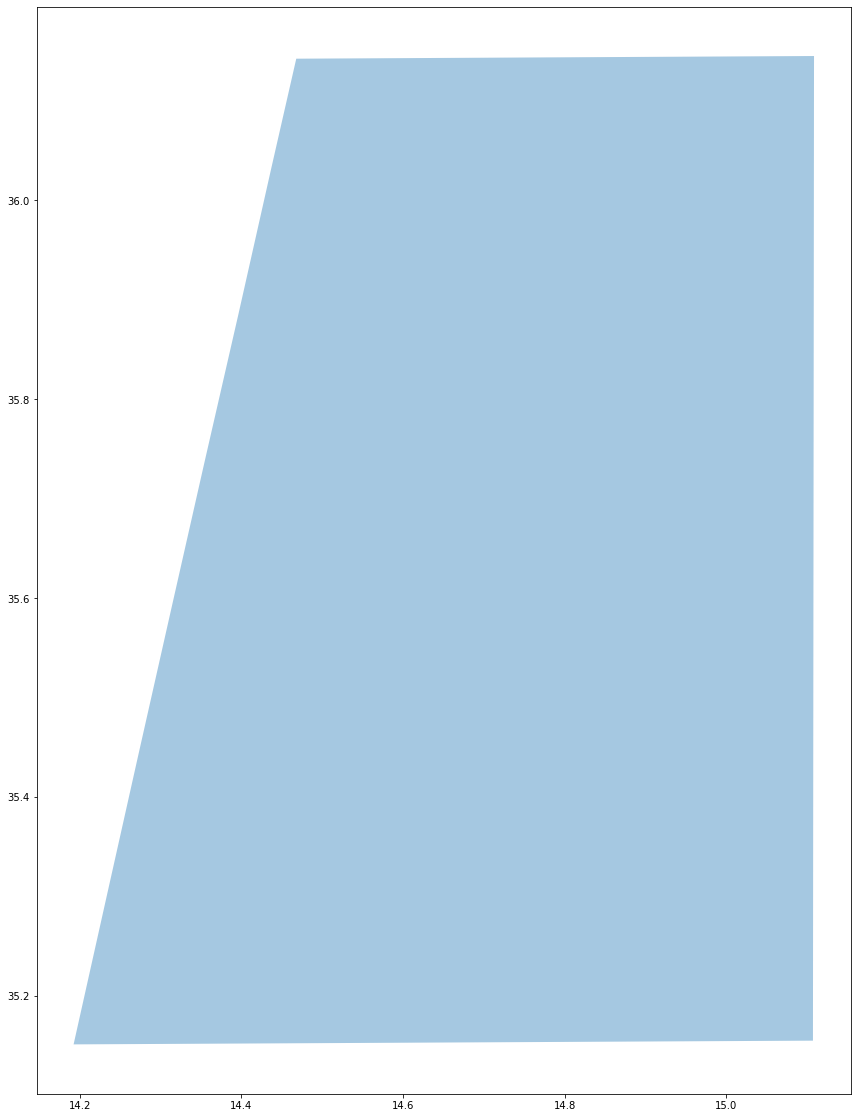

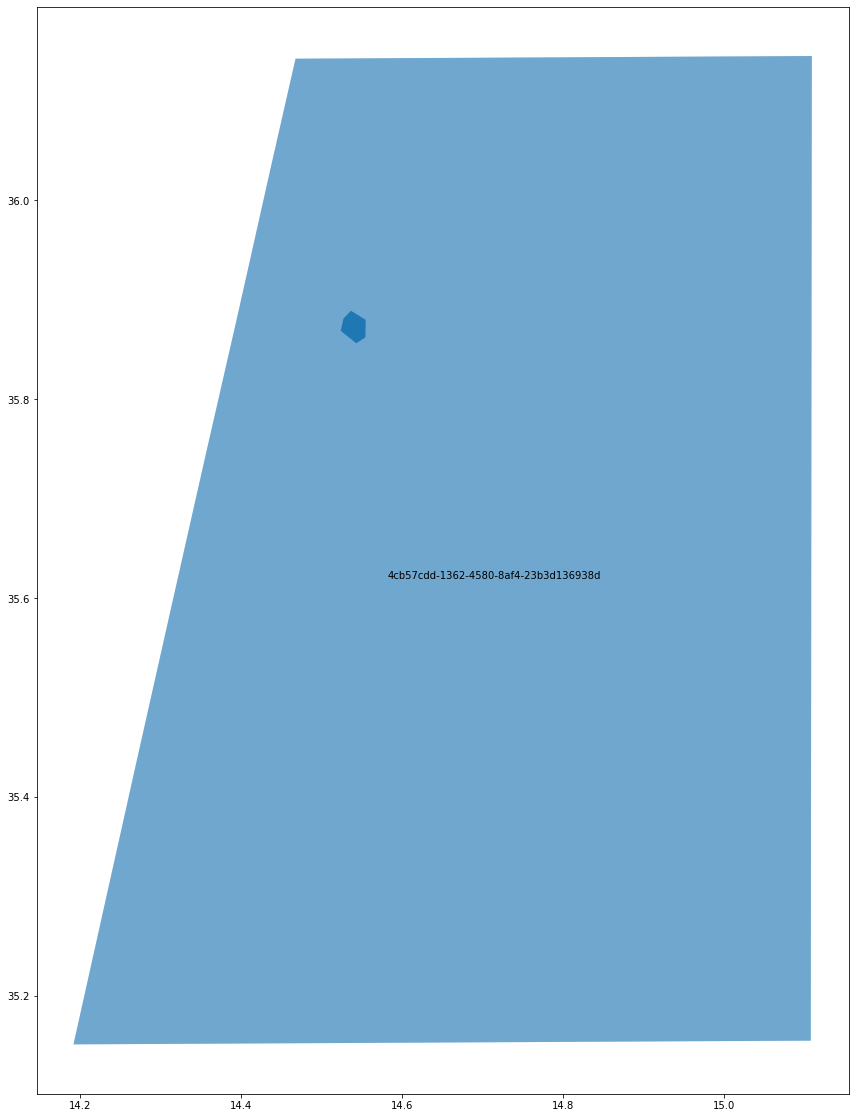

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
4cb57cdd-1362-4580-8af4-23b3d136938d,S2B_MSIL2A_20200305T094029_N0214_R036_T33SVV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-03-05T09:40:29.024Z, Instrument: MS...",false,2020-03-05 09:40:29.024,2020-03-05 09:40:29.024,2020-03-05 18:24:50.163,15649,...,02.14,Level-2A,S2MSI2A,Sentinel-2,511.98 MB,S2B_MSIL2A_20200305T094029_N0214_R036_T33SVV_2...,S2B_OPER_MSI_L1C_TL_MPS__20200305T114530_A0156...,S2B_MSIL2A_20200305T094029_N0214_R036_T33SVV_2...,4cb57cdd-1362-4580-8af4-23b3d136938d,"MULTIPOLYGON (((14.19236 35.15110, 15.10716 35..."


In [6]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None, alpha=0.4, figsize=(20, 20))

ax = areas.plot(column='uuid', cmap=None, alpha=0.4, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

gdf2 = gpd.read_file(boundsdata)
#f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None, alpha=0.4, figsize=(20, 20))
gdf2.plot(ax=ax)
plt.show()

products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted


Connect to Sentinelsat API and download all products


In [7]:
api.download_all(products)

Downloading: 100%|██████████| 537M/537M [01:13<00:00, 7.32MB/s] 
MD5 checksumming: 100%|██████████| 537M/537M [00:01<00:00, 363MB/s] 


({'4cb57cdd-1362-4580-8af4-23b3d136938d': {'id': '4cb57cdd-1362-4580-8af4-23b3d136938d',
   'title': 'S2B_MSIL2A_20200305T094029_N0214_R036_T33SVV_20200305T122508',
   'size': 536912709,
   'md5': '2A67C22439B03114F848DD0871C7DAF1',
   'date': datetime.datetime(2020, 3, 5, 9, 40, 29, 24000),
   'footprint': 'POLYGON((14.192355116227171 35.151100878716434,14.231549617982216 35.29369594631702,14.272215770856242 35.44129333976412,14.313193232710336 35.588923781996705,14.354332189491547 35.73656244038742,14.395965634119788 35.88407317563488,14.436885228164265 36.03179942886498,14.467862413971227 36.142165502866995,15.108489607947968 36.14484927635336,15.107159202344487 35.1548426456455,14.192355116227171 35.151100878716434))',
   'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('4cb57cdd-1362-4580-8af4-23b3d136938d')/$value",
   'Online': True,
   'Creation Date': datetime.datetime(2020, 3, 5, 18, 25, 8, 550000),
   'Ingestion Date': datetime.datetime(2020, 3, 5, 18, 24, 50, 163

Connect to Sentinelsat API and download a single products

Get the uuid and inspect product data

In [8]:
api.get_product_odata('6cc7c1a3-1a86-411c-a516-5fb82c8b59a4')

{'id': '6cc7c1a3-1a86-411c-a516-5fb82c8b59a4',
 'title': 'S2B_MSIL1C_20210208T094049_N0209_R036_T33SVV_20210208T115143',
 'size': 459998996,
 'md5': '1C1F851DC2234D9409D6452A7117795E',
 'date': datetime.datetime(2021, 2, 8, 9, 40, 49, 24000),
 'footprint': 'POLYGON((14.17618595344088 35.151034742983654,14.210655962279054 35.2753557555336,14.2513334612328 35.4229818910445,14.291928993281728 35.570571600954786,14.332599205608378 35.718141442784486,14.373927744329125 35.86557210091576,14.414598163593093 36.013259150831054,14.450522854461417 36.14209286241321,15.108489607947968 36.14484927635336,15.107159202344487 35.1548426456455,14.17618595344088 35.151034742983654))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('6cc7c1a3-1a86-411c-a516-5fb82c8b59a4')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 2, 8, 14, 45, 4, 895000),
 'Ingestion Date': datetime.datetime(2021, 2, 8, 14, 44, 30, 160000)}

Download the data

In [9]:
api.download('16eb9527-fd2a-44c1-a4e6-36e506a6d7c4')

Downloading: 100%|██████████| 363M/363M [00:54<00:00, 6.62MB/s] 
MD5 checksumming: 100%|██████████| 363M/363M [00:00<00:00, 386MB/s] 


{'id': '16eb9527-fd2a-44c1-a4e6-36e506a6d7c4',
 'title': 'S2A_MSIL1C_20181007T094031_N0206_R036_T33SVV_20181007T115542',
 'size': 363264257,
 'md5': 'c6a6201fa1aa7ab5bbdf971e4cd3a17b',
 'date': datetime.datetime(2018, 10, 7, 9, 40, 31, 24000),
 'footprint': 'POLYGON((14.18028550187583 35.15105151111466,14.218458271117356 35.290216441525445,14.259005982777753 35.43773282642145,14.299623005551824 35.58524911186538,14.340557995360236 35.732767098364995,14.382017565269187 35.880245260785095,14.42302482927292 36.027945658080675,14.45515128601461 36.142112252258045,15.108489607947968 36.14484927635336,15.107159202344487 35.1548426456455,14.18028550187583 35.15105151111466))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('16eb9527-fd2a-44c1-a4e6-36e506a6d7c4')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2018, 10, 7, 16, 31, 55, 363000),
 'Ingestion Date': datetime.datetime(2018, 10, 7, 16, 29, 32, 186000),
 'path': '.\\S2A_MSIL1C_20181007T094031_N0206_R036_T3